In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from decision_tree import DecisionTree
import pandas as pd
import numpy as np

In [2]:
breast_cancer_data = load_breast_cancer()
pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
X = breast_cancer_data.data
y = breast_cancer_data.target
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42, stratify=y_val_test)

In [4]:
def calculate_metrics(y_true, y_pred, print_results=True):
    # Overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Metrics for both classes
    precision_both = precision_score(y_true, y_pred, average=None)
    recall_both = recall_score(y_true, y_pred, average=None)
    f1_both = f1_score(y_true, y_pred, average=None)
    
    metrics = {
        'accuracy': accuracy,
        'class_0': {
            'precision': precision_both[0],
            'recall': recall_both[0],
            'f1_score': f1_both[0]
        },
        'class_1': {
            'precision': precision_both[1],
            'recall': recall_both[1],
            'f1_score': f1_both[1]
        }
    }
    
    if print_results:
        print("=" * 60)
        print(f"\n{'Overall Accuracy:':<30} {accuracy:.4f}")
        print("\n" + "-" * 60)
        print(f"{'Metric':<20} {'Class 0 (Malignant)':<20} {'Class 1 (Benign)':<20}")
        print("-" * 60)
        print(f"{'Precision':<20} {precision_both[0]:.4f}{'':<16} {precision_both[1]:.4f}")
        print(f"{'Recall':<20} {recall_both[0]:.4f}{'':<16} {recall_both[1]:.4f}")
        print(f"{'F1-Score':<20} {f1_both[0]:.4f}{'':<16} {f1_both[1]:.4f}")
        print("=" * 60)
    
    return metrics


## Hyperparameter Tuning

Exploring max_depth ∈ {2, 4, 6, 8, 10} and min_samples_split ∈ {2, 5, 10}

In [5]:
# Define hyperparameter grid
max_depths = [2, 4, 6, 8, 10]
min_samples_splits = [2, 5, 10]

# Store results for grid search
results = []

# Grid search over all combinations
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Train model
        dt = DecisionTree(max_depth=max_depth, min_samples_split=min_samples_split)
        dt.fit(X_train, y_train)
        
        # Evaluate on training and validation sets
        y_train_pred = dt.predict(X_train)
        y_val_pred = dt.predict(X_val)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy
        })
        
        print(f"max_depth={max_depth}, min_samples_split={min_samples_split}: "
              f"Train Acc={train_accuracy:.4f}, Val Acc={val_accuracy:.4f}")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df

max_depth=2, min_samples_split=2: Train Acc=0.9523, Val Acc=0.9176
max_depth=2, min_samples_split=5: Train Acc=0.9523, Val Acc=0.9176
max_depth=2, min_samples_split=5: Train Acc=0.9523, Val Acc=0.9176
max_depth=2, min_samples_split=10: Train Acc=0.9523, Val Acc=0.9176
max_depth=2, min_samples_split=10: Train Acc=0.9523, Val Acc=0.9176
max_depth=4, min_samples_split=2: Train Acc=0.9925, Val Acc=0.9882
max_depth=4, min_samples_split=2: Train Acc=0.9925, Val Acc=0.9882
max_depth=4, min_samples_split=5: Train Acc=0.9925, Val Acc=0.9882
max_depth=4, min_samples_split=5: Train Acc=0.9925, Val Acc=0.9882
max_depth=4, min_samples_split=10: Train Acc=0.9899, Val Acc=0.9882
max_depth=4, min_samples_split=10: Train Acc=0.9899, Val Acc=0.9882
max_depth=6, min_samples_split=2: Train Acc=0.9950, Val Acc=0.9647
max_depth=6, min_samples_split=2: Train Acc=0.9950, Val Acc=0.9647
max_depth=6, min_samples_split=5: Train Acc=0.9950, Val Acc=0.9647
max_depth=6, min_samples_split=5: Train Acc=0.9950, Val Ac

,max_depth,min_samples_split,train_accuracy,val_accuracy
0,2,2,0.952261,0.917647
1,2,5,0.952261,0.917647
2,2,10,0.952261,0.917647
3,4,2,0.992462,0.988235
4,4,5,0.992462,0.988235
5,4,10,0.989950,0.988235
6,6,2,0.994975,0.964706
7,6,5,0.994975,0.964706
8,6,10,0.992462,0.964706
9,8,2,1.000000,0.988235


### Find best hyperparameters based on validation accuracy

In [6]:
best_idx = results_df['val_accuracy'].idxmax()
best_params = results_df.iloc[best_idx]

print("="*70)
print("BEST HYPERPARAMETERS (based on validation accuracy):")
print("="*70)
print(f"max_depth: {int(best_params['max_depth'])}")
print(f"min_samples_split: {int(best_params['min_samples_split'])}")
print(f"Training Accuracy: {best_params['train_accuracy']:.4f}")
print(f"Validation Accuracy: {best_params['val_accuracy']:.4f}")
print("="*70)

BEST HYPERPARAMETERS (based on validation accuracy):
max_depth: 4
min_samples_split: 2
Training Accuracy: 0.9925
Validation Accuracy: 0.9882


### Combine training and validation sets

In [7]:
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# Retrain model with best hyperparameters on combined train+validation data
best_max_depth = int(best_params['max_depth'])
best_min_samples_split = int(best_params['min_samples_split'])

final_model = DecisionTree(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
final_model.fit(X_train_val, y_train_val)

# Evaluate on test set
y_test_pred = final_model.predict(X_test)

print("FINAL MODEL EVALUATION (trained on train+validation, tested on test set)")
print(f"Hyperparameters: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")
print()
test_metrics = calculate_metrics(y_test, y_test_pred)

FINAL MODEL EVALUATION (trained on train+validation, tested on test set)
Hyperparameters: max_depth=4, min_samples_split=2


Overall Accuracy:              0.8837

------------------------------------------------------------
Metric               Class 0 (Malignant)  Class 1 (Benign)    
------------------------------------------------------------
Precision            0.8667                 0.8929
Recall               0.8125                 0.9259
F1-Score             0.8387                 0.9091


### Confusion Matrix

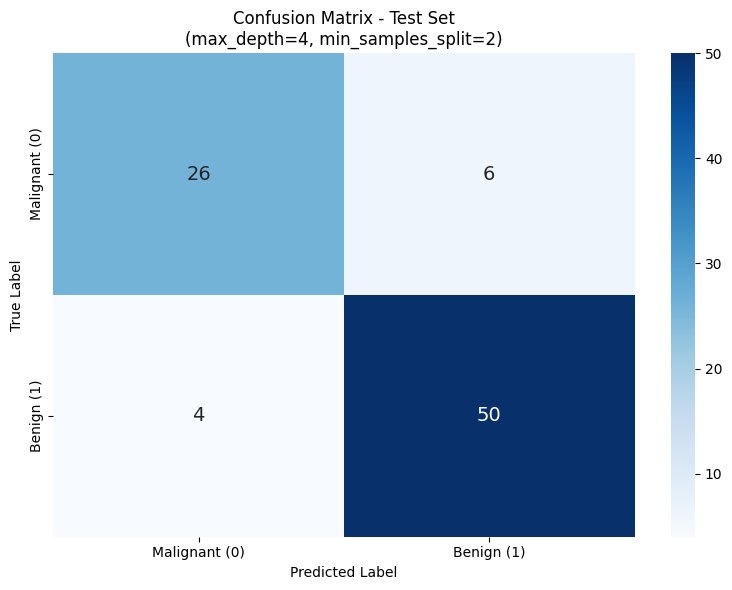

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'],
            ax=ax, annot_kws={'size': 14})

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(f'Confusion Matrix - Test Set\n(max_depth={best_max_depth}, min_samples_split={best_min_samples_split})')

plt.tight_layout()
plt.show()

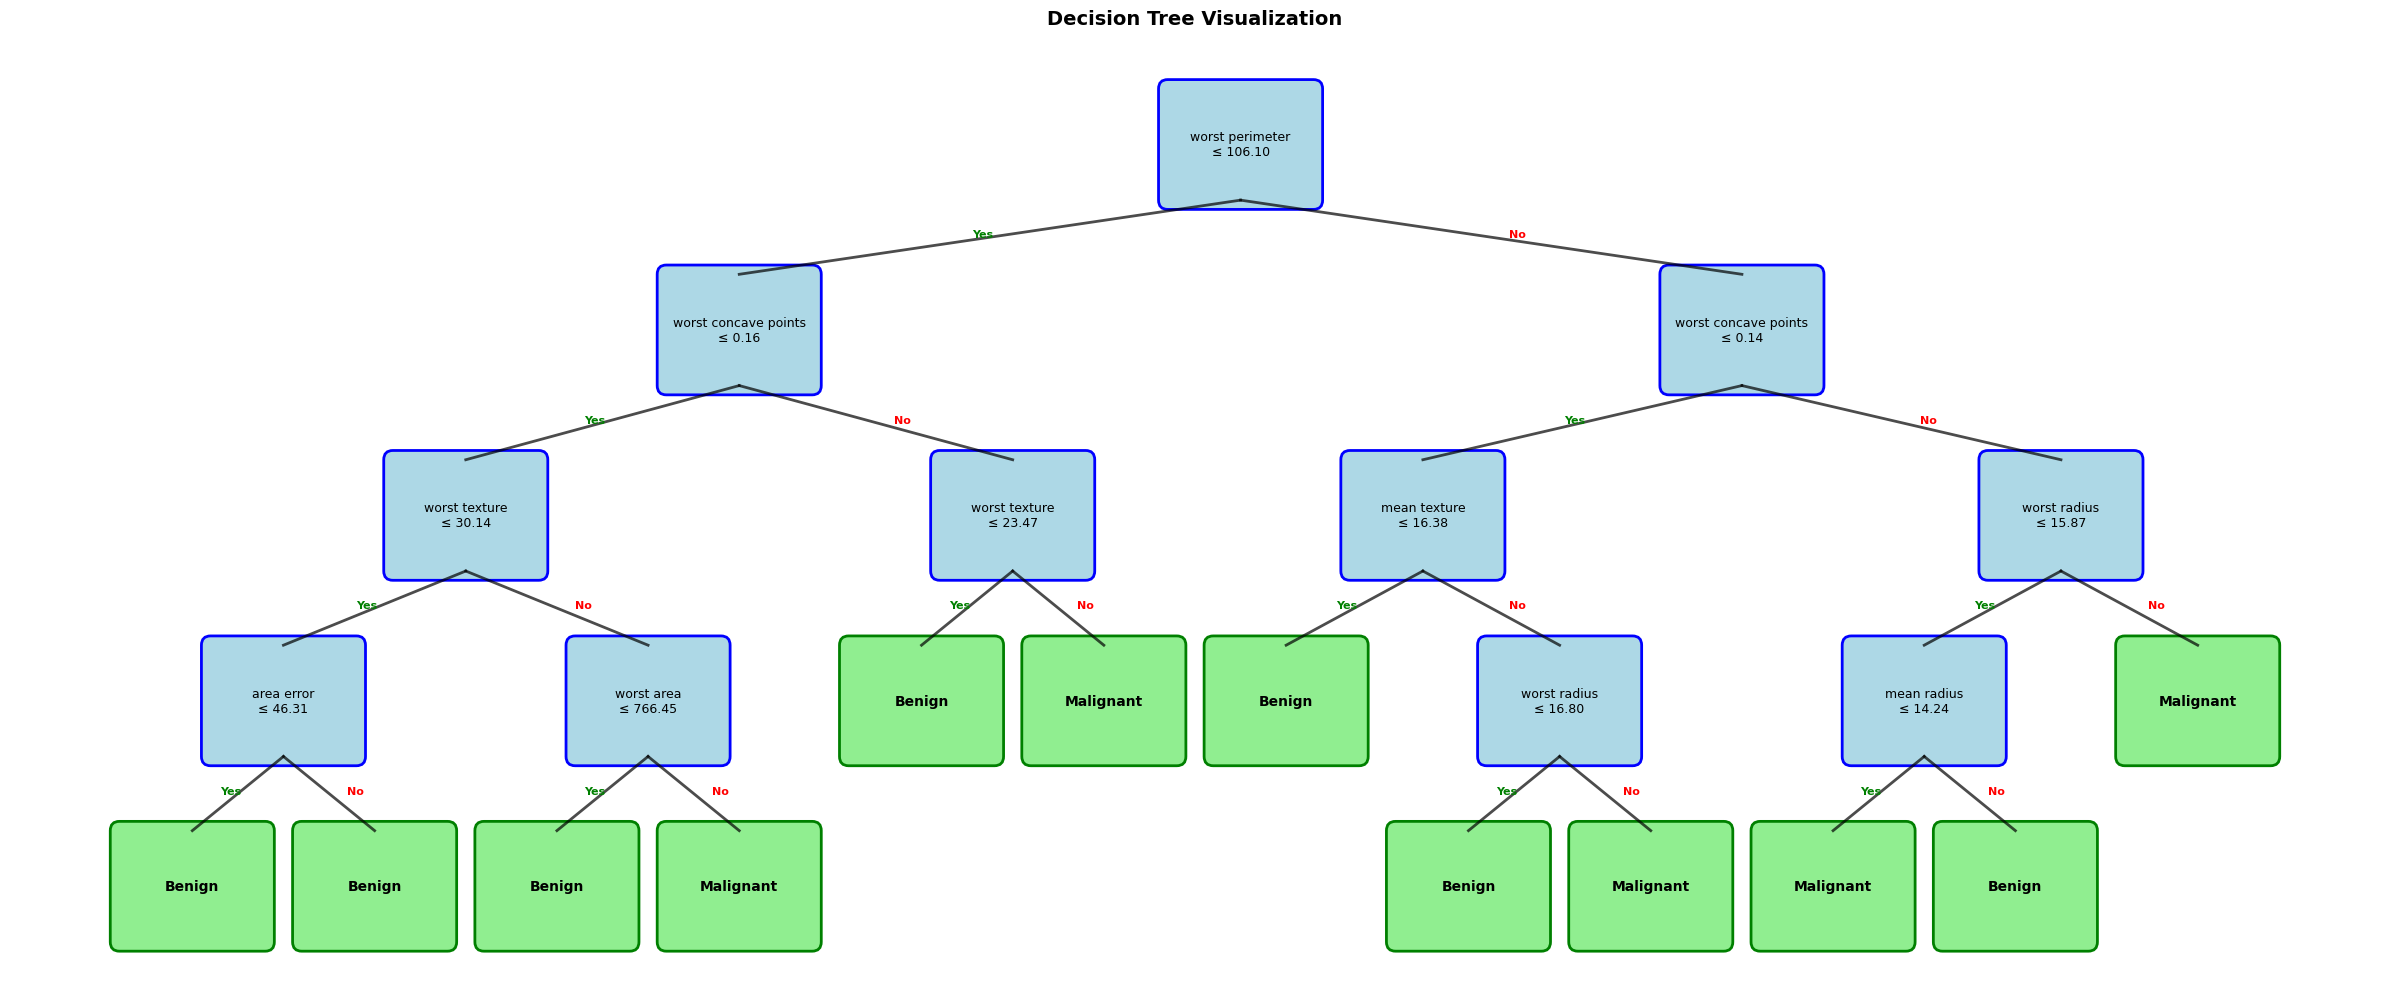

In [9]:
dt = DecisionTree(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
dt.fit(X_train_val, y_train_val)
dt.plot_tree(
    feature_names=breast_cancer_data.feature_names,
    class_names=['Malignant', 'Benign']
)

## Analysis: Impact of max_depth on Accuracy

Examining how training and validation accuracy change with max_depth (fixing min_samples_split)

In [10]:
# Analyze impact of max_depth for each min_samples_split value
for mss in min_samples_splits:
    print(f"\n{'='*50}")
    print(f"min_samples_split = {mss}")
    print('='*50)
    
    subset = results_df[results_df['min_samples_split'] == mss].sort_values('max_depth') # get values with min_samples_split
    display_df = subset[['max_depth', 'train_accuracy', 'val_accuracy']].copy()
    display_df.columns = ['max_depth', 'Train Accuracy', 'Val Accuracy']
    display_df = display_df.reset_index(drop=True)
    
    display(display_df)


min_samples_split = 2


,max_depth,Train Accuracy,Val Accuracy
0,2,0.952261,0.917647
1,4,0.992462,0.988235
2,6,0.994975,0.964706
3,8,1.000000,0.988235
4,10,1.000000,0.988235



min_samples_split = 5


,max_depth,Train Accuracy,Val Accuracy
0,2,0.952261,0.917647
1,4,0.992462,0.988235
2,6,0.994975,0.964706
3,8,0.994975,0.964706
4,10,0.994975,0.964706



min_samples_split = 10


,max_depth,Train Accuracy,Val Accuracy
0,2,0.952261,0.917647
1,4,0.989950,0.988235
2,6,0.992462,0.964706
3,8,0.992462,0.964706
4,10,0.992462,0.964706


### Tree Complexity: Analyze relationship between tree depth and performance 

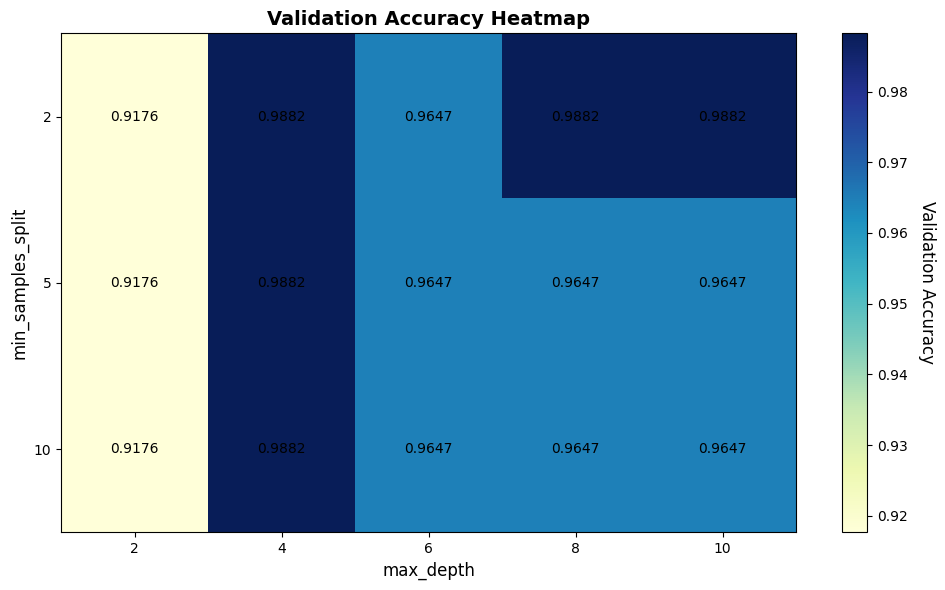

In [11]:
# Create a comprehensive heatmap of validation accuracy
pivot_val = results_df.pivot(index='min_samples_split', columns='max_depth', values='val_accuracy')

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(pivot_val, cmap='YlGnBu', aspect='auto')

# Set ticks and labels
ax.set_xticks(np.arange(len(max_depths)))
ax.set_yticks(np.arange(len(min_samples_splits)))
ax.set_xticklabels(max_depths)
ax.set_yticklabels(min_samples_splits)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Validation Accuracy', rotation=270, labelpad=20, fontsize=12)

# Add text annotations
for i in range(len(min_samples_splits)):
    for j in range(len(max_depths)):
        text = ax.text(j, i, f'{pivot_val.iloc[i, j]:.4f}',
                      ha="center", va="center", color="black", fontsize=10)

ax.set_xlabel('max_depth', fontsize=12)
ax.set_ylabel('min_samples_split', fontsize=12)
ax.set_title('Validation Accuracy Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()